# Setup a Cooke triplet macro with python

The following python code creates a .seq file which is a macro that can be executed within the CodeV cli with the command "in Cooke_triplet_macro.seq". This procedure is used for convenience in order to have a list of CodeV commands afterwards and to clearly separate between command syntax and text in this notebook. This file .seq can also be generated by the export function of OpTaliX (the glass names may be different, however, see file "Cooke_triplet.seq"):


In [2]:
PATH = r'C:\Users\herbst\CVUSER'
with open(PATH+ "\Cooke_triplet.seq", 'r') as f:
    print(f.read())

! Lens exported from OpTaliX 10.50, (C) Optenso
INI "OTX"
RDM;LEN
DIM M
EPD    36.600    
IFO 0.100000    
WL   546.0000    
WTW     1
REF   1
XAN      20.81000    -20.81000      0.00000      0.00000      0.00000
YAN       0.00000      0.00000      0.00000     20.81000    -20.81000
WTF   100  100  100  100  100
SO   0.00000000000      0.1000000000E+21 AIR
S   0.00000000000       0.000000000     AIR
  CIR   18.3000000000    
S   40.9400000000       8.740000000     SSK4_SUMITA
  SLB "1st lens 1st surface"
S   0.00000000000       11.05000000     AIR
  SLB "1st lens 2nd surface"
S  -55.6500000000       2.780000000     SF2_SCHOTT
S   39.7500000000       1.000000000     AIR
S   0.00000000000       6.630000000     AIR
  STO
  CIR   13.9449166402    
  SLB "aperture stop"
S   107.900000000       9.540000000     SSK4_SUMITA
S  -43.3300000000       78.00000000     AIR
  CIR   15.5000000000    
S   0.00000000000       0.000000000     AIR
S   0.00000000000      0.7645234269     AIR
SI   0.00000000

Once you have executed this notebook the file "Cooke_triplet_macro.seq" will be located in the path "filename" (see below).

At first a function is defined to write a string line into a file.

In [3]:
def wl(file, L):
    """
    Function for writing a line in a file.
    """   
    file.writelines(L)
    file.write("\n") 

## Setup of the optical model
Now the code to create the .seq file (with a sequence of CodeV commands) for the creation of an optical model of a Cooke triplet (as starting system) follows:

In [36]:
    import os
    from datetime import date
    today = date.today()
    d2 = today.strftime("%B %d, %Y")
    
    filename = "Cooke_triplet_macro.seq"      # name of the .mac file to be written using python
    f = open(os.path.join(r"C:\Users\herbst\CVUSER", filename),"w")
    
    wl(f, ['! execute in CodeV with: in '+str(filename)])
    wl(f, ['! this file should be located in CVUSER folder'])
    wl(f, ['! generated with python: ', d2])
    wl(f, [''])          # empty line
    
    wl(f, ['lcl num ^result ^i ^numFields'])
    wl(f, ['^numFields == 5'])
    wl(f, [''])          # empty line
    
    wl(f, ['! This macro sets up a Cooke triplet'])     # write our first commend
    wl(f, ['len'])                 # create a new lens
    wl(f, ['! dim m          ! standard is [mm]'])
    
    # lines marked with #O# are valid OpTaliX commands (however do not work in CodeV)
    # lines marked with #K# are valid KDP-2 commands
    
    #O#wl(f, ['ins s'+str(1)+'         ! insert one surface'])
    #O#wl(f, ['ins s'+str(2)+'..s'+str(10)+'       ! insert multiple surfaces'])
    wl(f, ['ins s'+str(1)+'         ! insert one surface'])
    wl(f, ['ins s'+str(2)+'..'+str(10)+'       ! insert multiple surfaces'])
    
    #K#wl(f, ['SAY '+str(18.47)])     # = starting marginal reference height at surface 1 (semi-diameter of entrance pupil)
    wl(f, ['EPD '+str(18.3*2)])    # = starting marginal reference height at surface 1 (entrance pupil)
    
    wl(f, ['WL   546.0000'])
    #K#wl(f, ['SCY FANG 20.81'])      # define reference object height, important for FOB!, p. 66 of KDP-2 manual, express object by angle
    #K#wl(f, ['YOB 20.81'])            # Object coordinates (Y) for finite object distances
    #K#wl(f, ['TH 1.0E20'])           # set thickness of 1st surface to infinite (beam collimated)
    wl(f, ['THI s0 1.0E20'])
    #K#wl(f, ['AIR'])                 # the medium of between surface 0 is air
    
    #K#wl(f, ['AIR'])                 # insert 2nd surface with medium air

    wl(f, [''])          # empty line    
    #O#wl(f, ['sut s1..s10 s      ! set surface types (s = spherical)'])
    wl(f, [''])          # empty line
    
    #O#wl(f, ['FHY s1 1           ! Sets the height of surfaces si..j to fixed '])    
    wl(f, ['THI s1 0'])
    
  
    wl(f, ['RDY s2 40.94'])            # set the radius of the 2nd surface
    wl(f, ['THI s2 8.74'])             # set the thickness between 2nd surface and 3rd surface
    #O#wl(f, ['CIR s2 p1 18.5'])           # set circular clear aperture to ...
    wl(f, ['CIR s2 18.5'])
    #O#wl(f, ['com s'+str(2)+' 1st lens 1st surface       ! surface comments'])   # give surface a surface comment
    #O#wl(f, ['GLA s2 K-SSK4'])          # set the medium to glass "SSK4"
    wl(f, ['GLA s2 SSK4'])          # set the medium to glass "SSK4"
    wl(f, [''])          # empty line
    
  
    wl(f, ['THI s3 11.05'])
    #O#wl(f, ['CIR s3 p1 18.5'])
    wl(f, ['CIR s3 18.5'])
    #O'wl(f, ['com s3 1st lens 2nd surface'])  # give surface a label  SLB "aperture stop"
    wl(f, [''])          # empty line
    
 
    wl(f, ['RDY s4 -55.65'])
    wl(f, ['THI s4 2.78'])
    #O#wl(f, ['CIR s4 p1 14.9'])
    wl(f, ['CIR s4 14.9'])
    wl(f, ['GLA s4 SF2'])
    wl(f, [''])          # empty line
    

    wl(f, ['RDY s5 39.75'])
    wl(f, ['THI s5 1'])
    #O#wl(f, ['CIR s5 p1 14.4'])
    wl(f, ['CIR s5 14.4'])
    #K#wl(f, ['AIR'])
    wl(f, [''])          # empty line
    
    wl(f, ['THI s6 6.63'])
    #wl(f, ['REFS'])                # reference surface
    #wl(f, ['ASTOP'])               # aperture stop
    wl(f, ['sto s6           ! set stop surface'])
    #O#wl(f, ['com s6 aperture stop'])  # give surface a label
    wl(f, ['slb s6 aperture stop'])
    #wl(f, ['AIR'])
    wl(f, [''])          # empty line
    
    wl(f, ['RDY s7 107.9'])
    wl(f, ['THI s7 9.54'])
    #O#wl(f, ['CIR s7 p1 15.5'])
    wl(f, ['CIR s7 15.5'])
    wl(f, ['GLA s7 SSK4'])
    wl(f, [''])          # empty line
    
    #O#wl(f, ['FHY s8 1           ! Sets the height of surfaces si..j to fixed '])   
    wl(f, ['RDY s8 -43.33'])
    wl(f, ['THI s8 78'])
    #O#wl(f, ['CIR s8 p1 15.5'])
    wl(f, ['CIR s8 15.5'])
    #K#wl(f, ['AIR'])
    wl(f, [''])          # empty line
    
    #K#wl(f, ['AIR'])
    #K#wl(f, ['AIR'])
    #K#wl(f, ['EOS'])
    wl(f, [''])          # empty line
    
    #O#wl(f, ['nfld '+str(5)])
    #wl(f, ['lcl num ^num_fields'])     not allowed here!
    #wl(f, ['^num_fields == (num f)'])  not allowed here!
    wl(f, ['for ^i 1 (^numFields-1)'])
    wl(f, ['   ins f^i  '])
    wl(f, ['end for'])

    wl(f, ['xan f1 '+str(20.81)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f1 '+str(0)])
    
    wl(f, ['xan f2 '+str(-20.81)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f2 '+str(0)])
    
    wl(f, ['xan f3 '+str(0)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f3 '+str(0)])
    
    wl(f, ['xan f4 '+str(0)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f4 '+str(20.81)])
    
    wl(f, ['xan f5 '+str(0)+   '!      set set x field angle of field 1'])
    wl(f, ['yan f5 '+str(-20.81)])
    wl(f, ['GO'])
    #K#wl(f, ['VIEVIG YES'])         # automatic vignetting in VIE
    wl(f, ['set vig'])
    #K#wl(f, ['SET MHT s1..8 f1..5 z1'])

    #O#wl(f, ['vie'])                # show lens layout
    wl(f, ['vie; go'])
    wl(f, ['v3d; go'])
    
    f.close()

You then go to KDP-2 folder start the application and input "input file Cooke_triplet.dat" in the command line. This will execute all the commands written with the function "wl" in this section. You will obtain this plot:

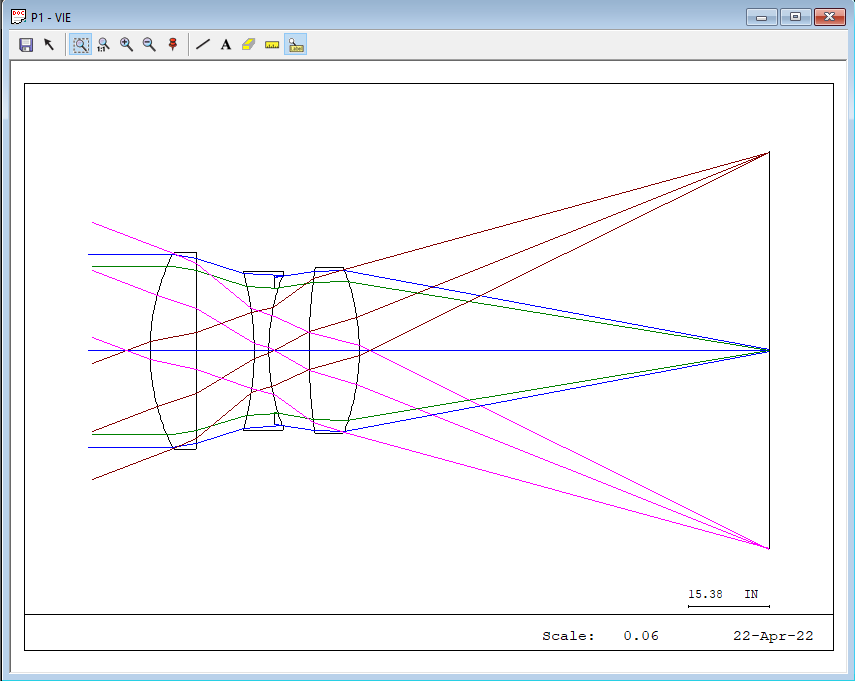

In [27]:
PATH = r'C:\Users\herbst\OpticalDesignDocu'
from IPython.display import Image
Image(filename = PATH + "\CodeV\CodeV_Cooke_triplet.png", width=1000, height=800)

 Or generate a 3d vie with "v3d" command:

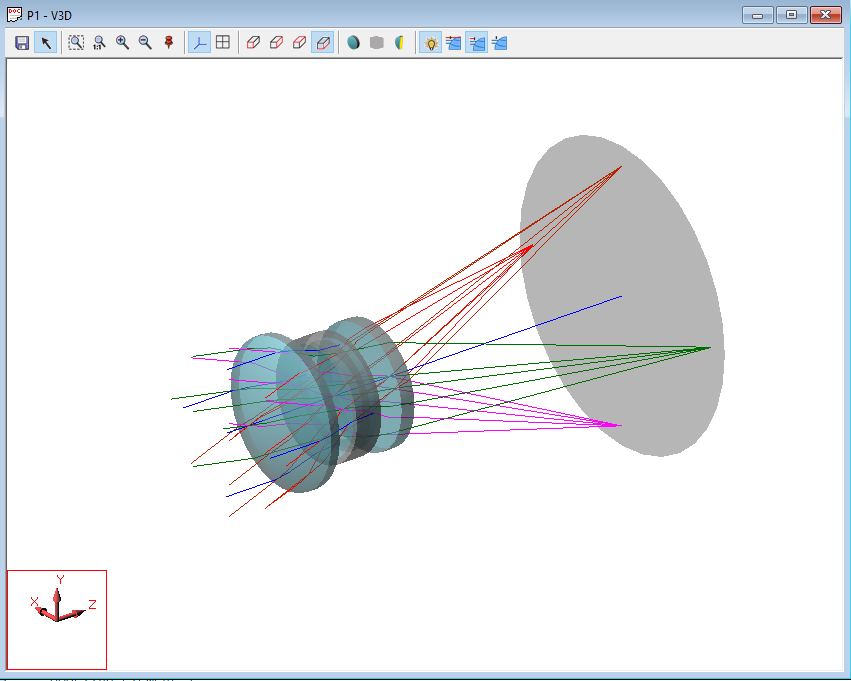

In [29]:
Image(filename = PATH + "\CodeV\CodeV_Cooke_triplet_3d.png", width=1000, height=800)

Or use POV ray to render the lens in 3D. This is no interactive plot, however.


The lens can be updated and its specifications can be changed:

## Analysis
The aberrations of this Cooke triplet can be analyzed with the following commands:

In [31]:
wl(f, ['THO'])

The 3rd, 5th and 7th order aberration values calculated are based on the work of Buchdahl. To calculate and display the 3rd, 5th and 7th order spherical aberrations, issue the command:

In [ ]:
wl(f, ['in cv_macro:plotForder s0..i zA TRA IMG'])

This calls the macro "plotForder" within the CodeV macro folder with "in cv_macro:".

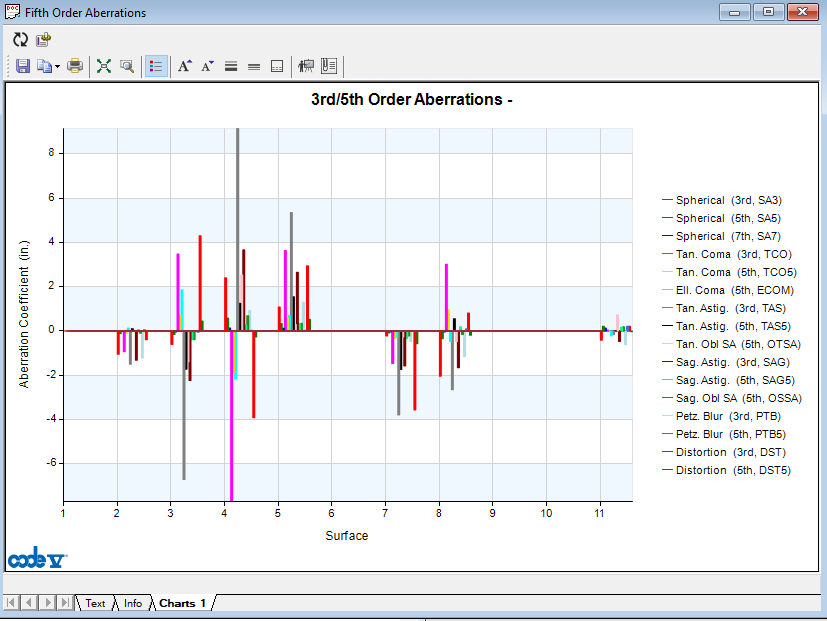

In [32]:
Image(filename = PATH + "\CodeV\CodeV_Cooke_5thorderaberr.png", width=1000, height=800)

Chromatic differences:

ABERRATION FANS AND THEIR PLOTS - To generate transverse fan data at a specific point in the field of view, issue an "FOB" command which specifies that fractional field of view location. In our example lens, the SCY FANG value was 20.81 degrees. To use "FOB" to specify that analysis is to be performed at a Y-object angle of 2.5 degrees and an X-object angle of 1.25 degrees, issue:
    

One obtains this table of values which can also be written to a text file (and plotted with matplotlib, e.g.) or it can be directly plotted with KDP-2 (see below).

In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_yfan_preopt.png", width=900, height=800)

The "FANS" command can be used to generate more complex ray fan aberration graphics. The next two commands generate YZ and XZ-plane, transverse ray aberration plots at three pre-selected field of view positions.

In [37]:
#Image(filename = PATH + "\KDP-2_Cooke_triplet_fans_preopt.png", width=900, height=800)

Plotting of spot diagrams in CodeV:

In [33]:
wl(f, ['SPO; CAN; SPO; GO;'])

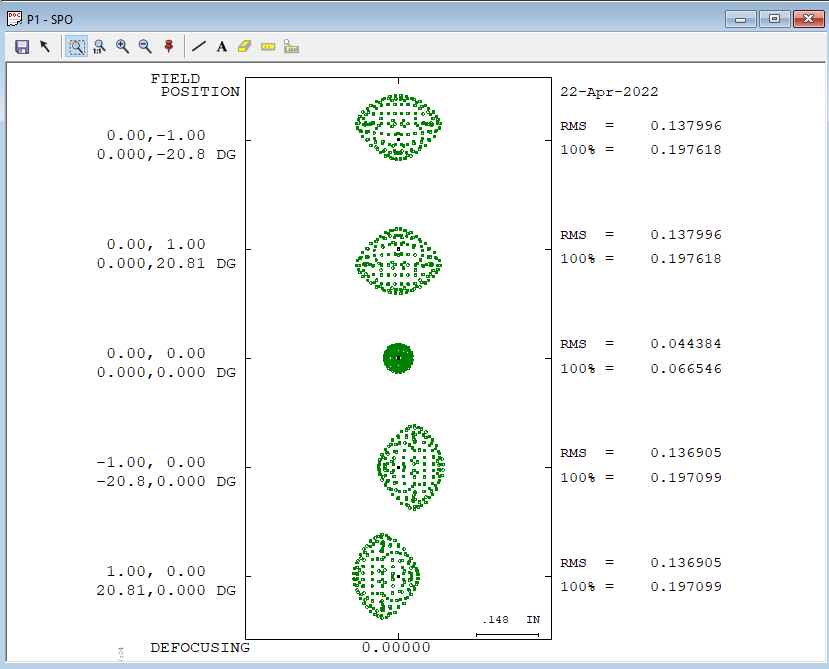

In [35]:
Image(filename = PATH + "\CodeV\CodeV_Cooke_spot_diagram.png", width=900, height=800)

DIFFRACTION MTF - Diffraction MTF generation and plotting is almost as easy. Try the following commands to generate DOTF data at fractional object point Y=.1 and X=.2:

In [ ]:
wl(f, ['FOB .1 .2'])
wl(f, ['CAPFN'])         # generates the complex aperture function
wl(f, ['DOTF'])          # generates the MTF
wl(f, ['pltdotf'])       # plots the MTF 

In [ ]:
Image(filename = PATH + "\KDP-2_Cooke_triplet_mtf_unopt.png", width=900, height=800)

## Optimization with predefined operands:

The aim is to vary the last surface curvature and its conic constant of the current lens so as to change the system focal length to 100 mm while at the same time driving the 3rd order spherical aberration to 0.0. 

Lists of predefined target operands in CodeV are here: 


Just type the following lines in the CodeV cli:

Do a PY solve:


Next, set up the operands (targets) with the following commands:

Next, set up the variables with the following commands:

This optimization problem can be solved with damped least squares (ITER) or directly (PFIND) since we have two variables and two operands which happen to be linearly independent. We will do a combination of the two techniques. Type:

After these optimization cycles, the FMT (Figure of Merit) will be much smaller than it was. Before we started, it was 0.13095. The new focal length and SA3 values will be very near their target values. Further cycles could drive the values closer to their targets. The new curvature and conic values can be seen by issuing another VB command or by issuing an RTG ALL or an RTG 8 command. The thickness of surface 9 has now changed to 0.474615 mm in order to maintain paraxial focus. There are other optimization methods described in the reference manual which you should try.